# Explore data 

In [34]:
import pandas as pd
import numpy as np
import geopandas as gpd
pd.set_option('display.max_columns', None)

## Missing data analisis

In [40]:
df = pd.read_csv('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/data_frame_20y')
df.rename(columns={ df.columns[0]: "index" }, inplace = True)

In [41]:
df.isnull().sum()

index                    0
rgi_id                   0
period                   0
dvoldt                   0
dmdtda                   0
O2Region                 0
tstar_aar               18
tstar_ela_h             18
Slope                    0
Aspect                   0
Lmax                     0
Area                     0
Zmed                     0
Zmin                     0
Zmax                     0
ice_thickness            0
glacial_lake             0
debris_vol_ela_p         0
debris_area_ela_p        0
temp_mean                0
temp_diff                0
prcp_diff                0
prcp_mean                0
temp_diff_1980-2000      0
temp_mean_1980-2000      0
prcp_diff_1980_2000      0
prcp_mean_1980_2000      0
velocity_mean          311
dtype: int64

In [42]:
null_data = df[df.isnull().any(axis=1)]
null_data = null_data['rgi_id']

In [43]:
# from: https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Selecting numerical values of df
list_numerical = df.drop(['rgi_id','period','O2Region','glacial_lake','Aspect'],axis=1).columns
df_num = df[list_numerical]

# Setting the random_state argument for reproducibility
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df_num)
df_imputed = pd.DataFrame(imputed, columns=df_num.columns)

df = pd.concat([df_imputed, df[['rgi_id','O2Region','glacial_lake','Aspect']]], axis=1)

In [44]:
df['velocity_mean'] = df['velocity_mean'].clip(lower=0)

In [45]:
all_imputed = df.merge(null_data,on='rgi_id',how='inner')

## Outlier detection

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

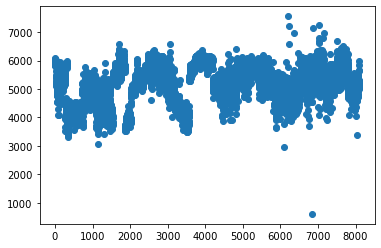

In [47]:
import matplotlib.pyplot as plt
  
plt.scatter(df['index'], df['Zmed'],)
 
# To show the plot
plt.show()

In [48]:
df[df['Zmed']<1000]

,index,dvoldt,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,rgi_id,O2Region,glacial_lake,Aspect
6833,6833.0,-1871895.0,-0.6364,0.608102,4994.133119,19.0,1888.0,2.5,610.0,521.0,1141.0,54.195225,51.4408,41.628264,-0.522071,0.228974,501.053,17772.6125,0.282096,-1.293343,698.899,17373.5995,33.385338,RGI60-15.02228,2,0.0,0.0


In [49]:
df = df.drop(['index'],axis=1)

In [50]:
df = df[df['Zmed']>3000] # only consider glaciers above 3000m 

## Distribuiton of variables

In [51]:
df = pd.read_csv('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/df_no_missing')
df.rename(columns={ df.columns[0]: "index" }, inplace = True)

In [52]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

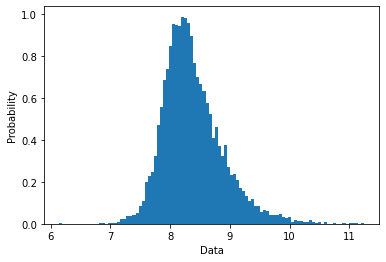

In [53]:
x = df['Lmax']
x = np.log(x+1) #log transform x

plt.hist(x, density=True, bins=100)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

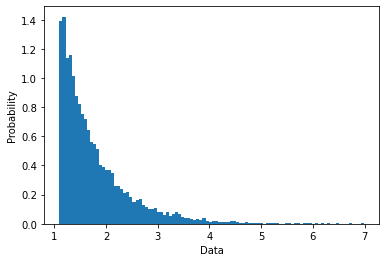

In [54]:
x = df['Area']
x = np.log(x+1) #log transform x

plt.hist(x, density=True, bins=100)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

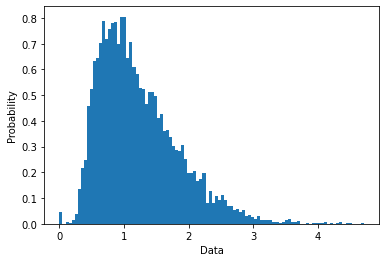

In [55]:
x = df['velocity_mean']
x = np.log(x+1) #log transform x

plt.hist(x, density=True, bins=100)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [56]:
# log transform the variables
df['Area_log'] = np.log(df['Area']+1)
df['Velocity_log'] = np.log(df['velocity_mean']+1)

## summary statistics per O2 region

In [57]:
rgi13 = gpd.read_file('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/RGI/nsidc0770_13_rgi60_CentralAsia/13_rgi60_CentralAsia.shp')
rgi14 = gpd.read_file('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/RGI/nsidc0770_14_rgi60_SouthAsiaWest/14_rgi60_SouthAsiaWest.shp')
rgi15 = gpd.read_file('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/RGI/nsidc0770_15_rgi60_SouthAsiaEast/15_rgi60_SouthAsiaEast.shp')

In [58]:
# rgi_concat = pd.concat([rgi13,rgi14,rgi15],ignore_index=True)
rgi13 = rgi13.rename(columns={"RGIId": "rgi_id"})
rgi13 = rgi13[rgi13['Area'] > 2]
rgi13 = rgi13[['rgi_id']]
rgi13 = pd.DataFrame(rgi13)

rgi14 = rgi14.rename(columns={"RGIId": "rgi_id"})
rgi14 = rgi14[rgi14['Area'] > 2]
rgi14 = rgi14[['rgi_id']]
rgi14 = pd.DataFrame(rgi14)

rgi15 = rgi15.rename(columns={"RGIId": "rgi_id"})
rgi15 = rgi15[rgi15['Area'] > 2]
rgi15 = rgi15[['rgi_id']]
rgi15 = pd.DataFrame(rgi15)

In [59]:
df13 = df.merge(rgi13,on='rgi_id',how='inner')
df14 = df.merge(rgi14,on='rgi_id',how='inner')
df15 = df.merge(rgi15,on='rgi_id',how='inner')

In [60]:
df13_1 = df13[df13['O2Region'] == 1]
df13_2 = df13[df13['O2Region'] == 2]
df13_3 = df13[df13['O2Region'] == 3]
df13_4 = df13[df13['O2Region'] == 4]
df13_5 = df13[df13['O2Region'] == 5]
df13_6 = df13[df13['O2Region'] == 6]
df13_7 = df13[df13['O2Region'] == 7]
df13_8 = df13[df13['O2Region'] == 8]
df13_9 = df13[df13['O2Region'] == 9]

df14_1 = df14[df14['O2Region'] == 1]
df14_2 = df14[df14['O2Region'] == 2]
df14_3 = df14[df14['O2Region'] == 3]

df15_1 = df15[df15['O2Region'] == 1]
df15_2 = df15[df15['O2Region'] == 2]
df15_3 = df15[df15['O2Region'] == 3]

In [61]:
df13_1_mean = pd.DataFrame(df13_1.mean(),columns=['13_1'])
df13_2_mean = pd.DataFrame(df13_2.mean(),columns=['13_2'])
df13_3_mean = pd.DataFrame(df13_3.mean(),columns=['13_3'])
df13_4_mean = pd.DataFrame(df13_4.mean(),columns=['13_4'])
df13_5_mean = pd.DataFrame(df13_5.mean(),columns=['13_5'])
df13_6_mean = pd.DataFrame(df13_6.mean(),columns=['13_6'])
df13_7_mean = pd.DataFrame(df13_7.mean(),columns=['13_7'])
df13_8_mean = pd.DataFrame(df13_8.mean(),columns=['13_8'])
df13_9_mean = pd.DataFrame(df13_9.mean(),columns=['13_9'])

df14_1_mean = pd.DataFrame(df14_1.mean(),columns=['14_1'])
df14_2_mean = pd.DataFrame(df14_2.mean(),columns=['14_2'])
df14_3_mean = pd.DataFrame(df14_3.mean(),columns=['14_3'])

df15_1_mean = pd.DataFrame(df15_1.mean(),columns=['15_1'])
df15_2_mean = pd.DataFrame(df15_2.mean(),columns=['15_2'])
df15_3_mean = pd.DataFrame(df15_3.mean(),columns=['15_3'])

In [62]:
stats = (pd.concat([df13_1_mean, df13_2_mean, df13_3_mean, df13_4_mean, df13_5_mean, df13_6_mean, df13_7_mean, df13_8_mean, df13_9_mean,
                    df14_1_mean, df14_2_mean, df14_3_mean,
                    df15_1_mean, df15_2_mean, df15_3_mean], axis=1, join="outer"))
stats.round(2)

,13_1,13_2,13_3,13_4,13_5,13_6,13_7,13_8,13_9,14_1,14_2,14_3,15_1,15_2,15_3
index,1290.87,1563.39,1512.78,2803.07,2725.76,2563.72,2158.26,3021.13,304.06,6398.79,5004.38,5950.77,7291.51,7229.79,7641.86
dvoldt,-758783.77,-922323.20,-2291645.21,-2862153.32,806743.20,-736182.34,-1485727.75,-2177621.14,-6337274.21,-1132649.86,-1092964.24,-2886550.77,-3175790.92,-3983951.76,-4591403.24
dmdtda,-0.09,-0.09,-0.27,-0.49,0.16,-0.06,-0.28,-0.31,-0.57,-0.18,-0.03,-0.34,-0.35,-0.46,-0.56
tstar_aar,0.53,0.55,0.54,0.51,0.56,0.52,0.55,0.53,0.53,0.53,0.54,0.53,0.56,0.60,0.52
tstar_ela_h,4037.47,4795.19,4137.48,3909.61,5699.78,5460.60,4978.40,5840.54,5200.31,4860.16,5336.23,5118.16,5368.02,5547.30,5004.38
Slope,17.87,20.83,19.64,17.86,18.76,16.14,17.97,14.54,22.77,17.37,24.17,17.06,20.50,19.98,21.42
Lmax,4877.07,5399.93,4751.68,4296.29,5295.41,4253.19,3770.77,4213.89,5238.32,5372.05,5960.15,5015.58,5408.22,5194.89,4063.15
Area,5.53,7.93,8.42,5.09,9.62,6.75,4.45,6.32,8.22,6.27,12.56,6.36,7.05,7.23,6.30
Zmed,4064.91,4870.75,4172.06,3915.34,5752.54,5482.67,5013.06,5858.88,5252.53,4900.18,5399.83,5125.81,5427.08,5626.79,5012.73
Zmin,3513.52,4268.41,3665.08,3494.20,5177.96,5096.69,4576.54,5486.01,4453.52,4317.33,4708.60,4577.81,4722.38,5062.25,4379.82


## anlaysis lakes

In [63]:
df_lakes = df[df['glacial_lake']==1.0]
df_lakes['Slope'].mean()

17.02739557739558

In [64]:
len(df_lakes)/len(df)

0.10050623533769601

In [65]:
df_lakes = df[df['glacial_lake']==1.0]
df_lakes['dmdtda'].mean()

-0.39522260442260415

In [66]:
df_Nolakes = df[df['glacial_lake']==0.0]
df_Nolakes['Slope'].mean()

20.029910775566304

In [67]:
df_Nolakes = df[df['glacial_lake']==0.0]
df_Nolakes['dmdtda'].mean()

-0.19920667124227878

###  analysis Aspact

In [69]:
df_Aspect = df[df['Aspect']==1.0]
df_Aspect['temp_mean'].mean()

-6.940935089916991

In [70]:
df_Aspect = df[df['Aspect']==1.0]
df_Aspect['dmdtda'].mean()

-0.2314520805369128

In [71]:
df_NoAspect = df[df['Aspect']==0.0]
df_NoAspect['temp_mean'].mean()

-7.570359915561071

In [72]:
df_NoAspect = df[df['Aspect']==0.0]
df_NoAspect['dmdtda'].mean()

-0.21412626193724496

### Plotsslope and lake

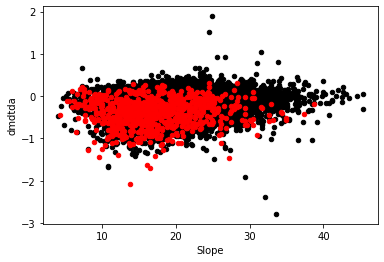

In [73]:
df_plot = df
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("all_regions_slope_lake.png")

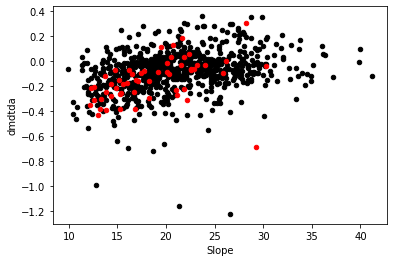

In [74]:
df_plot = df13_2
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_2.png")

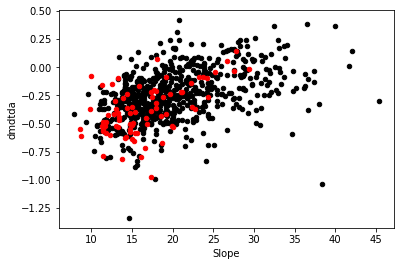

In [75]:
df_plot = df13_3
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_3.png")

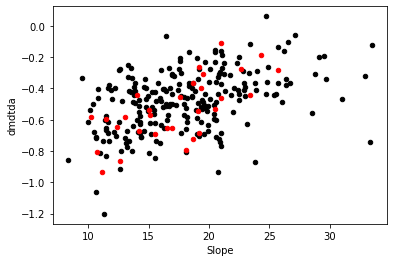

In [76]:
df_plot = df13_4
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_4.png")

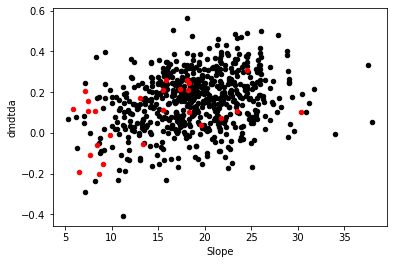

In [77]:
df_plot = df13_5
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_5.png")

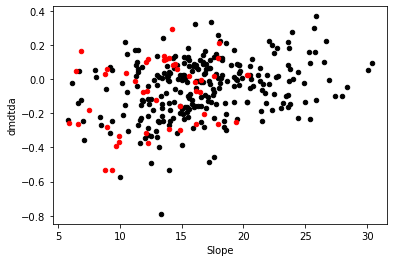

In [78]:
df_plot = df13_6
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_6.png")

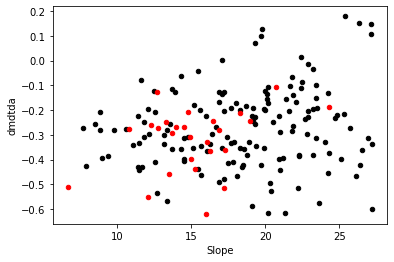

In [79]:
df_plot = df13_7
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_7.png")

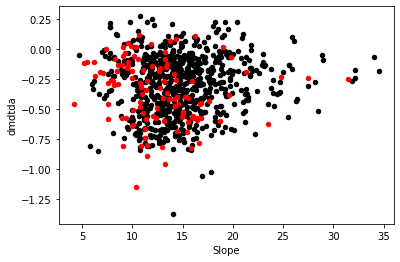

In [80]:
df_plot = df13_8
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_8.png")

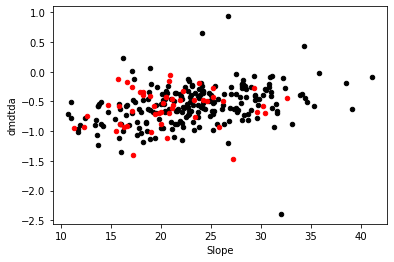

In [81]:
df_plot = df13_9
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_9.png")

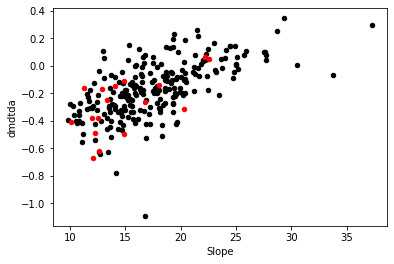

In [82]:
df_plot = df14_1
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("14_1.png")

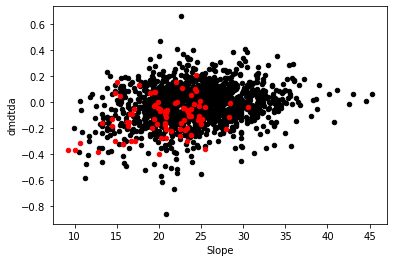

In [83]:
df_plot = df14_2
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("14_2.png")

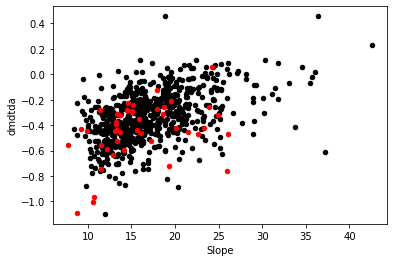

In [84]:
df_plot = df14_3
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("14_3.png")

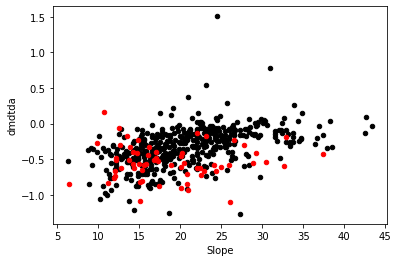

In [85]:
df_plot = df15_1
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("15_1.png")

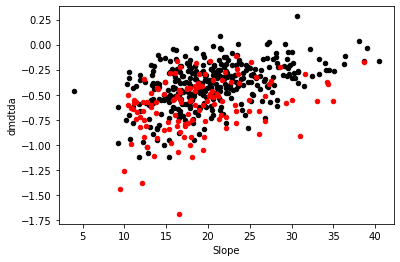

In [86]:
df_plot = df15_2
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("15_2.png")

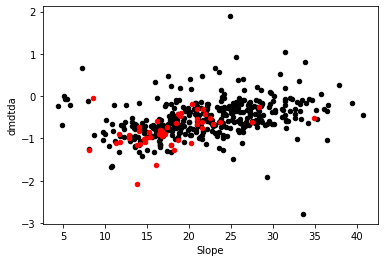

In [87]:
df_plot = df15_3
ax = df_plot[df_plot.glacial_lake == 0.0].plot.scatter('Slope', 'dmdtda', color='black')
plot = df_plot[df_plot.glacial_lake == 1.0].plot.scatter('Slope', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("15_3.png")

### Plots debris and Zmed

In [88]:
debG = df[df['debris_vol_ela_p']>0.3]
(debG['dmdtda'].mean(), debG['Zmed'].mean())

(-0.24648523055980925, 5034.562531904033)

In [89]:
debG = df[df['debris_vol_ela_p']<0.3]
(debG['dmdtda'].mean(), debG['Zmed'].mean())

(-0.1459667416741673, 5551.691269126913)

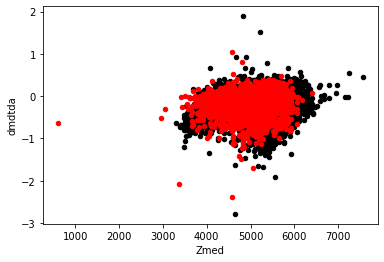

In [90]:
df_plot = df
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("all_regions_debris.png")

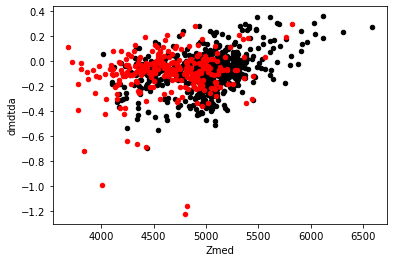

In [91]:
df_plot = df13_2
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_2_debris.png")

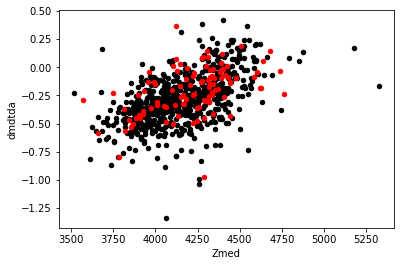

In [92]:
df_plot = df13_3
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_3_debris.png")

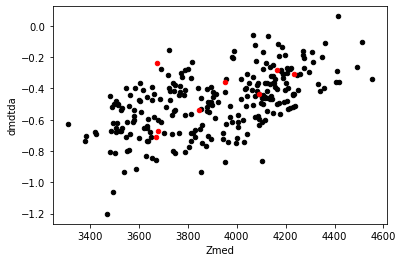

In [93]:
df_plot = df13_4
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_4_debris.png")

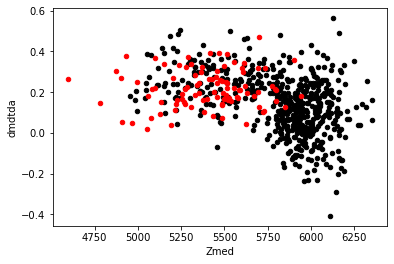

In [94]:
df_plot = df13_5
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_5_debris.png")

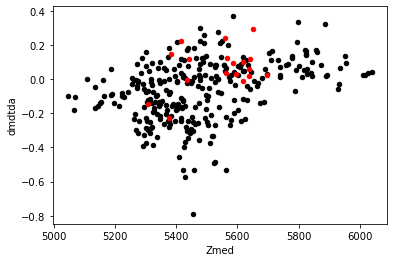

In [95]:
df_plot = df13_6
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_6_debris.png")

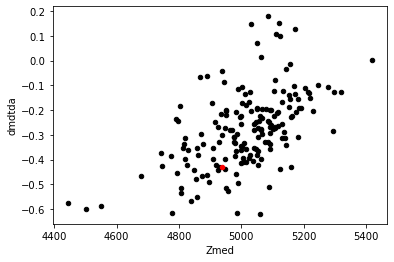

In [96]:
df_plot = df13_7
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_7_debris.png")

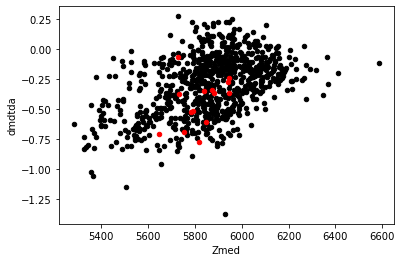

In [97]:
df_plot = df13_8
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_8_debris.png")

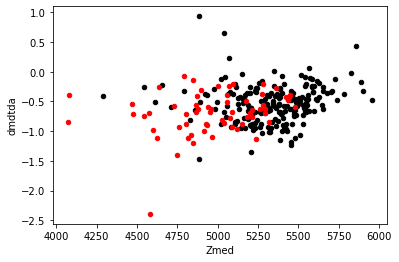

In [98]:
df_plot = df13_9
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("13_9_debris.png")

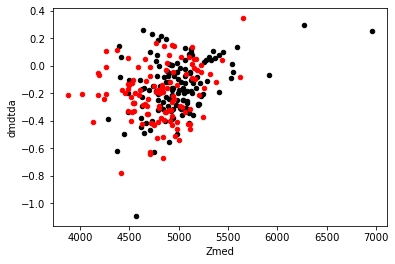

In [99]:
df_plot = df14_1
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("14_1_debris.png")

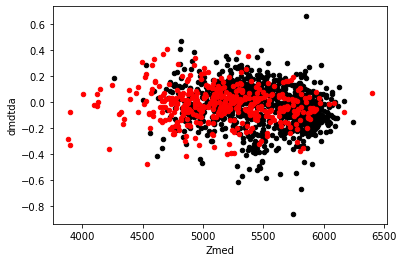

In [100]:
df_plot = df14_2
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("14_2_debris.png")

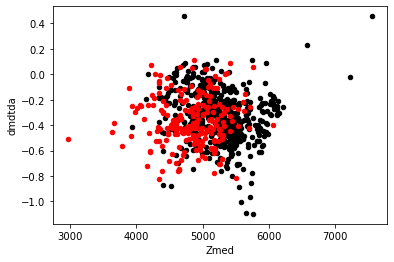

In [101]:
df_plot = df14_3
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("14_3_debris.png")

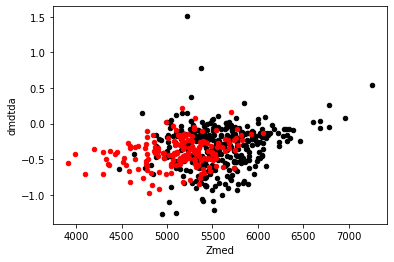

In [102]:
df_plot = df15_1
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("15_1_debris.png")

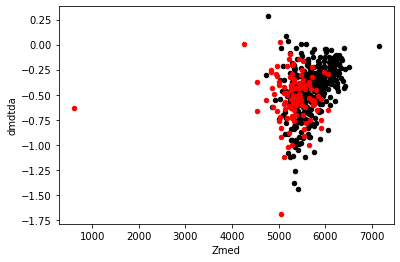

In [103]:
df_plot = df15_2
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("15_2_debris.png")

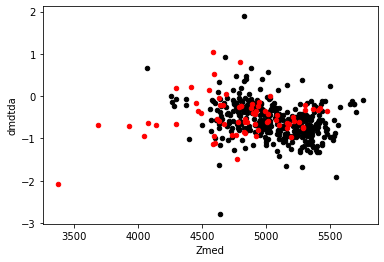

In [104]:
df_plot = df15_3
ax = df_plot[df_plot.debris_area_ela_p < 30.0].plot.scatter('Zmed', 'dmdtda', color='black')
plot = df_plot[df_plot.debris_area_ela_p > 30.0].plot.scatter('Zmed', 'dmdtda', ax=ax, color='red')
fig = plot.get_figure()
fig.savefig("15_3_debris.png")